## Rubén Castillo y Manuel Rubio

## Kernel Ridge Regression (KRR)
Regresión no-lineal regularizada.
* Generar conjunto de entrenamiento para predecir la función seno. 
* Expandir entradas en potencias (matriz de Vandermonde) para el ajuste polinómico con el regresor lineal (LR) y regresor lineal regularizado (LRR)
* Obtener pesos optimos para LR, LRR y KRR
* Calcula la salida para datos de test [0,2pi]
* Representa la salida estimada y la deseada

Analiza los resultados:
* Modifica la constante de regularización.
* Modifica la anchura del kernel RBF.
* Modifica el orden del ajuste polinómico. 

In [1]:
import numpy as np
# Genero datos de train
N=12
#X = np.linspace(0, np.pi * 2.0, N)
rng=np.random.RandomState(4)
X_train = rng.uniform(0, np.pi * 2.0, N)[:,np.newaxis]
y_train = np.sin( X_train )
print(X_train.shape[0])

12


In [2]:
# Entreno modelos lineales

# Variable de entrada constante a uno para incluir bias en los pesos 
def addones(XX):
    return np.concatenate([XX, np.ones((XX.shape[0],1))],axis=1)
XX=X_train
M=5 #M<2 linear regression ; M>=2 polynomic regression
for p in range(2,M+1,1): XX = np.concatenate([X_train**p, XX],axis=1)
XX=addones(XX)
Y=y_train

# np.linalg.inv()
# XX.T.dot
# np.eye()

# Regresion lineal sin regularizacion
#pesos del modelo 
Wlr=(np.linalg.inv(np.dot(XX.T,XX)))
Wlr = np.dot(np.dot(Wlr,XX.T),Y)
# Regresion lineal con regularizacion
l=0.1 #constante de regularizacion (lambda)

#matriz identidad
I=np.eye(XX.shape[1])

#pesos del modelo 
Wlrr= (np.linalg.inv(np.dot(XX.T,XX) +l*I))
Wlrr = np.dot(np.dot(Wlrr,XX.T),Y)

In [3]:
# Entreno molelo no lineal
from sklearn.metrics.pairwise import rbf_kernel

#inversa de la anchura del kernel
#gamma= 1/(XX.shape[0])
gamma= 1

#matriz kernel de train
K=rbf_kernel(X_train,X_train,gamma=gamma)

 #matriz identidad
In=np.eye(K.shape[0])

#pesos del modelo 
alpha = np.dot(np.linalg.inv(K + l*In),y_train)

In [4]:
# Predicción
# Datos de test
X = np.linspace(0, np.pi * 2.0, 100)
X =X[:,np.newaxis]
# Señal deseada
y = np.sin( X )

X_t = X
for p in range(2,M+1,1): X_t = np.concatenate([X**p, X_t],axis=1)
X_t=addones(X_t)

#Predicciones
#prediccion lineal
y_lr= np.dot(X_t,Wlr)

#prediccion lineal regularizado
y_lrr=np.dot(X_t,Wlrr)


#matriz kernel de test
Ktest=rbf_kernel( X,X_train,gamma=gamma)

#prediccion kernel ridge
y_krr=np.dot(Ktest,alpha)

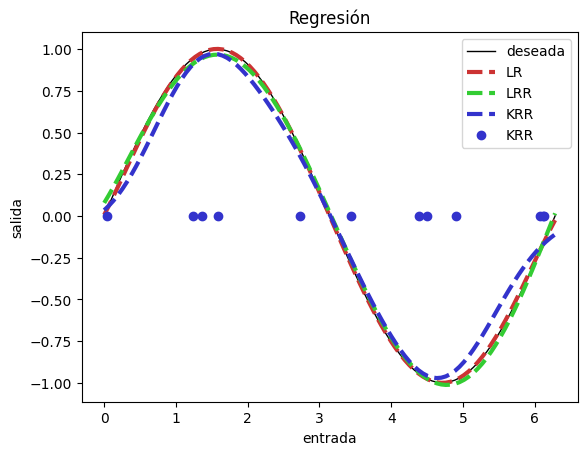

In [5]:
# Representación de la salida estimada
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(X, y, 'k-', label='deseada', lw=1)
plt.plot(X, y_lr, '--', color=(0.8, 0.2, 0.2), label='LR', lw=3)
plt.plot(X, y_lrr, '--', color=(0.2, 0.8, 0.2), label='LRR', lw=3)
plt.plot(X, y_krr, '--', color=(0.2, 0.2, 0.8), label='KRR', lw=3)
plt.plot(X_train, np.zeros((12,1)), 'o', color=(0.2, 0.2, 0.8), label='KRR', lw=3)


plt.xlabel('entrada')
plt.ylabel('salida')
plt.title('Regresión')
plt.legend(loc="upper right")


### Cambios en el rango de los datos
Además, se prueba a estudiar el comportamiento de cada uno de los modelos atendiendo al rango en que el esta contenido el conjunto de test. Para ello, se conservan los entrenamientos de cada uno en $[0,2\pi]$, mientras que el conjunto de test se genera en el intervalo $[-2\pi,4\pi]$

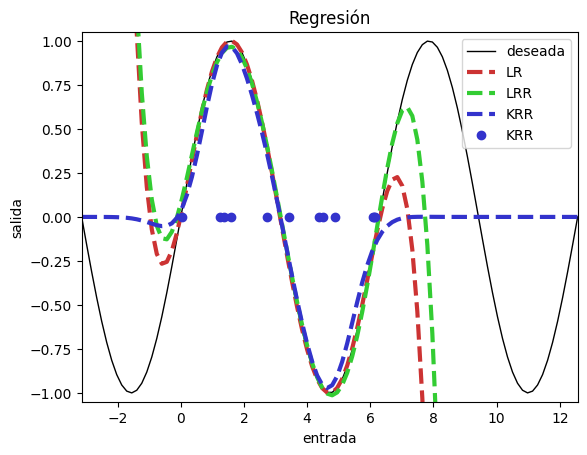

In [6]:
# Predicción
# Datos de test
X = np.linspace(-np.pi, np.pi * 4.0, 100)
X =X[:,np.newaxis]
# Señal deseada
y = np.sin( X )

X_t = X
for p in range(2,M+1,1): X_t = np.concatenate([X**p, X_t],axis=1)
X_t=addones(X_t)

#Predicciones
#prediccion lineal
y_lr= np.dot(X_t,Wlr)

#prediccion lineal regularizado
y_lrr=np.dot(X_t,Wlrr)


#matriz kernel de test
Ktest=rbf_kernel( X,X_train,gamma=gamma)

#prediccion kernel ridge
y_krr=np.dot(Ktest,alpha)

# Representación de la salida estimada
%matplotlib inline

plt.plot(X, y, 'k-', label='deseada', lw=1)
plt.plot(X, y_lr, '--', color=(0.8, 0.2, 0.2), label='LR', lw=3)
plt.plot(X, y_lrr, '--', color=(0.2, 0.8, 0.2), label='LRR', lw=3)
plt.plot(X, y_krr, '--', color=(0.2, 0.2, 0.8), label='KRR', lw=3)
plt.plot(X_train, np.zeros((12,1)), 'o', color=(0.2, 0.2, 0.8), label='KRR', lw=3)

plt.xlim([ X.min(0), X.max(0)])
plt.ylim([-1.05, 1.05])

plt.xlabel('entrada')
plt.ylabel('salida')
plt.title('Regresión')
plt.legend(loc="upper right")


Como se observa en el gráfico, los modelos lineales fuera del intervalo tienden a valores infinitos, alejandose completamente de los datos de la función original, además de hacerlo muy rapidamente. En cambio, para el modelo no lineal, en las zonas donde en el conjunto de entrenamiento no existian datos cercanos, con el gamma seleccionado su valor es 0, dado que no existen gaussianas cercanas que otorguen valor alguno a estos intervalos.

### Estudio de los parámetros de cada modelo

En cuanto al estudio de los parámetros que afectan a cada uno de los modelos, en primer lugar se estudia el orden del ajuste polinómico del modelo lineal. Los resultados obtenidos por los modelos lineales han sido los siguientes

In [7]:
# Genero datos de train
N=12
rng=np.random.RandomState(4)
X_train = rng.uniform(0, np.pi * 2.0, N)[:,np.newaxis]
y_train = np.sin( X_train )

# Entreno modelos lineales

M=[1,2,3,4,6,10] #M<2 linear regression ; M>=2 polynomic regression
res = []
for tam in M:
    XX=X_train
    for p in range(2,tam+1,1): XX = np.concatenate([X_train**p, XX],axis=1)
    XX=addones(XX)
    Y=y_train
    Wlr=(np.linalg.inv(np.dot(XX.T,XX)))
    Wlr = np.dot(np.dot(Wlr,XX.T),Y)
    l=0.1 #constante de regularizacion (lambda)

    I=np.eye(XX.shape[1])

    #pesos del modelo 
    Wlrr= (np.linalg.inv(np.dot(XX.T,XX) +l*I))
    Wlrr = np.dot(np.dot(Wlrr,XX.T),Y)

    # Predicción
    # Datos de test
    X = np.linspace(0, np.pi * 2.0, 100)
    X =X[:,np.newaxis]
    # Señal deseada
    y = np.sin( X )

    X_t = X
    for p in range(2,tam+1,1): X_t = np.concatenate([X**p, X_t],axis=1)
    X_t=addones(X_t)

    #Predicciones
    #prediccion lineal
    y_lr= np.dot(X_t,Wlr)

    #prediccion lineal regularizado
    y_lrr=np.dot(X_t,Wlrr)
    res.append((y_lr,y_lrr))


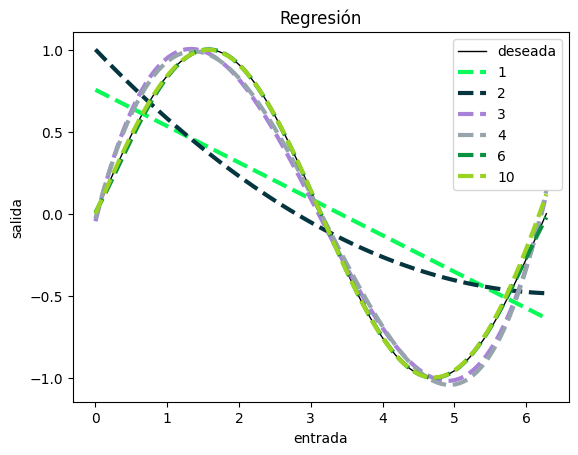

In [8]:
%matplotlib inline

# Representación gráfica
plt.plot(X, y, 'k-', label='deseada', lw=1)
for i,j in enumerate(res):
    plt.plot(X, j[0], '--', color=(np.random.random(size=1).tolist()[0],
                                 np.random.random(size=1).tolist()[0], np.random.random(size=1).tolist()[0]), label=str(M[i]), lw=3)

plt.xlabel('entrada')
plt.ylabel('salida')
plt.title('Regresión')
plt.legend(loc="upper right")

Se puede observar que en este caso es necesario una polinomio de grado 3 o mayor para capturar los datos de este rango de forma adecuada. En el caso de tomar un intervalo mayor, sería necesario un polinomio de grado mayor para capturar los datos de forma correcta. El uso de polinomios de un grado mayor a 3 proporciona resultados muy parecidos, al sobreajustar de forma total al conjunto de entrenamiento.

#### Constante de regularización
En segundo lugar, se realiza un estudio de como afecta la constante de regularización en el modelo lineal regularizado

In [9]:
# Obtención de los datos
N=12
rng=np.random.RandomState(4)
X_train = rng.uniform(0, np.pi * 2.0, N)[:,np.newaxis]
y_train = np.sin( X_train )

XX=X_train
M=5 
for p in range(2,M+1,1): XX = np.concatenate([X_train**p, XX],axis=1)
XX=addones(XX)
Y=y_train

I=np.eye(XX.shape[1])

lamb=[0.01,0.1,0.5,1,10] #constante de regularizacion (lambda)
res = []

for l in lamb:
    #pesos del modelo 
    Wlrr= (np.linalg.inv(np.dot(XX.T,XX) +l*I))
    Wlrr = np.dot(np.dot(Wlrr,XX.T),Y)

    # Datos de test
    X = np.linspace(-0.5, np.pi * 2.0 +0.5, 100)
    X =X[:,np.newaxis]
    y = np.sin( X )

    X_t = X
    for p in range(2,M+1,1): X_t = np.concatenate([X**p, X_t],axis=1)
    X_t=addones(X_t)

    #Predicciones
    y_lrr=np.dot(X_t,Wlrr)
    res.append(y_lrr)


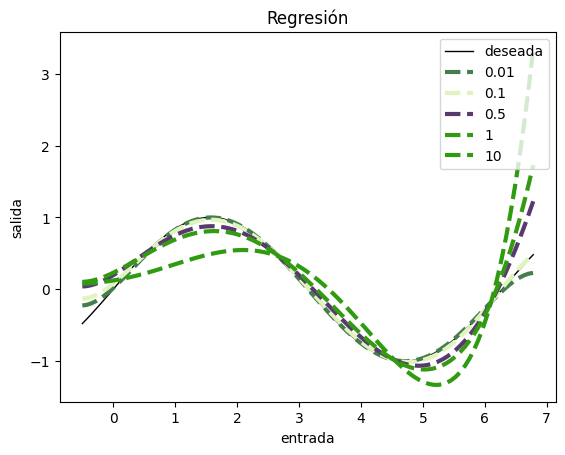

In [10]:
%matplotlib inline

# Representación gráfica
plt.plot(X, y, 'k-', label='deseada', lw=1)
for i,j in enumerate(res):
    plt.plot(X, j, '--', color=(np.random.random(size=1).tolist()[0],
                                 np.random.random(size=1).tolist()[0], np.random.random(size=1).tolist()[0]), label=str(lamb[i]), lw=3)

plt.xlabel('entrada')
plt.ylabel('salida')
plt.title('Regresión')
plt.legend(loc="upper right")

Se observa que, para regularizaciones de hasta 0.1, los valores se aproximan a los datos de forma casi identica a los de la recta de valores reales. Si se utilizan regularizaciones de más de 1 los resultados dejan de parecerse, al tener demasiada importancia en el modelo los valores de los pesos que el ajuste a los datos. Una regularización lo más alta posible pero que aproxime de forma correcta los datos es util de cara a aproximar de forma correcta valores que disten de los del conjunto de entrenamiento, ya que permite una mejor generalización, siendo un buen ejemplo este caso el 0.1, que aproximan mejor los valores en la inmediación del intervalo de entrenamiento $[0,2\pi]$

#### Anchura del kernel
Por último, se estudia para el modelo no lineal la influencia que tiene la anchura del kernel

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import rbf_kernel
N=12
rng=np.random.RandomState(4)
X_train = rng.uniform(0, np.pi * 2.0, N)[:,np.newaxis]
y_train = np.sin( X_train )

gamma= [0.01,0.1,1,10]
res = []

for i in gamma:
    K=rbf_kernel(X_train,X_train,gamma=i)
    In=np.eye(K.shape[0])
    l=0.1
    M=5
    alpha = np.dot(np.linalg.inv(K + l*In),y_train)

    # Predicción
    # Datos de test
    X = np.linspace(0, np.pi * 2.0, 100)
    X =X[:,np.newaxis]
    y = np.sin( X )

    X_t = X
    for p in range(2,M+1,1): X_t = np.concatenate([X**p, X_t],axis=1)
    X_t=addones(X_t)


    Ktest=rbf_kernel( X,X_train,gamma=i)
    y_krr=np.dot(Ktest,alpha)
    res.append(y_krr)

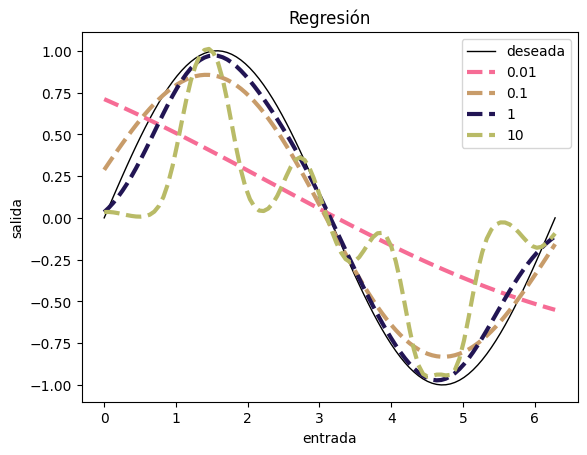

In [12]:
%matplotlib inline

# Representación gráfica
plt.plot(X, y, 'k-', label='deseada', lw=1)
for i,j in enumerate(res):
    plt.plot(X, j, '--', color=(np.random.random(size=1).tolist()[0],
                                 np.random.random(size=1).tolist()[0], np.random.random(size=1).tolist()[0]), label=str(gamma[i]), lw=3)

plt.xlabel('entrada')
plt.ylabel('salida')
plt.title('Regresión')
plt.legend(loc="upper right")

Como se observa, para valores grandes de gamma las gausianas generadas son estrechas, de forma que no capturan de forma adecuada los datos en el intervalo donde no existe ningun valor del conjunto de entrenamiento cerca. Del mismo modo, un valor de gamma bajo genera gaussianas demasiado anchas, que suavizan de forma importante los valores en el intervalo de los datos, haciendo que las predicciones sean malas.